In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
convMb=0.28002*100

In [3]:
def convkeV(x):
    return 25.0*(x**2)

In [4]:
folder="~/newmonti/calculos/"

In [5]:
s = open("/home/ale/newmonti/calculos/O8/O8_CDW.dat").read()
s = s.replace('D+', 'E+')
s = s.replace('D-', 'E-')
f = open("/home/ale/newmonti/calculos/O8/O8_CDW.dat", 'w')
f.write(s)
f.close()

In [6]:
irows=14

In [7]:
P_CDW=[]
He_CDW=[]
Be_CDW=[]
C_CDW=[]
O_CDW=[]
for i in range(5):
    dump=pd.read_csv(folder+"P/P_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    dumhe=pd.read_csv(folder+"He2/He2_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    dumbe=pd.read_csv(folder+"Be4/Be4_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    dumc=pd.read_csv(folder+"C6/C6_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    dumo=pd.read_csv(folder+"O8/O8_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    P_CDW.append(dump)
    He_CDW.append(dumhe)
    Be_CDW.append(dumbe)
    C_CDW.append(dumc)
    O_CDW.append(dumo)

In [8]:
# some data points are scaled born calculations 
ht=He_CDW[0]
ct=He_CDW[1]
nt=He_CDW[2]
ot=He_CDW[3]
pt=He_CDW[4]
for i in range(9,14):
    ht.at[i,4]=ht[4][i]*2**2
    ct.at[i,4]=ct[4][i]*2**2
    nt.at[i,4]=nt[4][i]*2**2
    ot.at[i,4]=ot[4][i]*2**2
    pt.at[i,4]=pt[4][i]*2**2

In [10]:
ht=Be_CDW[0]
ct=Be_CDW[1]
nt=Be_CDW[2]
ot=Be_CDW[3]
pt=Be_CDW[4]
ht.at[13,4]=ht[4][13]*4**2
ct.at[13,4]=ct[4][13]*4**2
nt.at[13,4]=nt[4][13]*4**2
ot.at[13,4]=ot[4][13]*4**2
pt.at[13,4]=pt[4][13]*4**2

In [11]:
ht=C_CDW[0]
ct=C_CDW[1]
nt=C_CDW[2]
ot=C_CDW[3]
pt=C_CDW[4]
ht.at[13,4]=ht[4][13]*6**2
ct.at[13,4]=ct[4][13]*6**2
nt.at[13,4]=nt[4][13]*6**2
ot.at[13,4]=ot[4][13]*6**2
pt.at[13,4]=pt[4][13]*6**2

In [12]:
ht=O_CDW[0]
ct=O_CDW[1]
nt=O_CDW[2]
ot=O_CDW[3]
pt=O_CDW[4]
ht.at[13,4]=ht[4][13]*8**2
ct.at[13,4]=ct[4][13]*8**2
nt.at[13,4]=nt[4][13]*8**2
ot.at[13,4]=ot[4][13]*8**2
pt.at[13,4]=pt[4][13]*8**2

In [13]:
H_P=P_CDW[0]
C_P=P_CDW[1]
N_P=P_CDW[2]
O_P=P_CDW[3]
P_P=P_CDW[4]

In [14]:
H_He=He_CDW[0]
C_He=He_CDW[1]
N_He=He_CDW[2]
O_He=He_CDW[3]
P_He=He_CDW[4]

In [15]:
H_Be=Be_CDW[0]
C_Be=Be_CDW[1]
N_Be=Be_CDW[2]
O_Be=Be_CDW[3]
P_Be=Be_CDW[4]

In [16]:
H_C=C_CDW[0]
C_C=C_CDW[1]
N_C=C_CDW[2]
O_C=C_CDW[3]
P_C=C_CDW[4]

In [17]:
H_O=O_CDW[0]
C_O=O_CDW[1]
N_O=O_CDW[2]
O_O=O_CDW[3]
P_O=O_CDW[4]

In [55]:
AP_CDW=[]
for i in range(6):
    dumap=pd.read_csv(folder+"AP/AP_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    AP_CDW.append(dumap)

In [56]:
H_AP=AP_CDW[0]
H_AP[4]=H_AP[4]/4.
C_AP=AP_CDW[1]
N_AP=AP_CDW[2]
O_AP=AP_CDW[3]
P_AP=AP_CDW[4]
S_AP=AP_CDW[5]

In [43]:
S_CDW=[]
for i in range(5):
    dumap=pd.read_csv(folder+"sulfur/S_CDW.dat",sep=' ',delimiter='\s+',header=None,skiprows=(1+irows)*i+1,nrows=irows)
    S_CDW.append(dumap)

In [44]:
S_P=S_CDW[0]
S_He=S_CDW[1]
S_Be=S_CDW[2]
S_C=S_CDW[3]
S_O=S_CDW[4]

# Implementing Cubic Spline

In [62]:
from scipy import interpolate
import numpy as np

In [63]:
def interp_XS(xp,yp):
    x=xp.values
    y=yp.values
    n=len(x)
    tck = interpolate.splrep(x, y, s=0)
    xnew = np.arange(x[0], x[n-1], 0.1)
    ynew = interpolate.splev(xnew, tck, der=0)
    return xnew, ynew

In [64]:
xH_Pint, yH_Pint = interp_XS(H_P[1],H_P[4])
xH_APint,yH_APint = interp_XS(H_AP[1],H_AP[4])
xH_Heint,yH_Heint = interp_XS(H_He[1],H_He[4])
xH_Beint,yH_Beint = interp_XS(H_Be[1],H_Be[4])
xH_Cint, yH_Cint = interp_XS(H_C[1],H_C[4])
xH_Oint, yH_Oint = interp_XS(H_O[1],H_O[4])

In [65]:
xC_Pint, yC_Pint = interp_XS(C_P[1],C_P[4])
xC_APint,yC_APint = interp_XS(C_AP[1],C_AP[4])
xC_Heint,yC_Heint = interp_XS(C_He[1],C_He[4])
xC_Beint,yC_Beint = interp_XS(C_Be[1],C_Be[4])
xC_Cint, yC_Cint = interp_XS(C_C[1],C_C[4])
xC_Oint, yC_Oint = interp_XS(C_O[1],C_O[4])

In [66]:
xN_Pint, yN_Pint = interp_XS(N_P[1],N_P[4])
xN_APint,yN_APint = interp_XS(N_AP[1],N_AP[4])
xN_Heint,yN_Heint = interp_XS(N_He[1],N_He[4])
xN_Beint,yN_Beint = interp_XS(N_Be[1],N_Be[4])
xN_Cint, yN_Cint = interp_XS(N_C[1],N_C[4])
xN_Oint, yN_Oint = interp_XS(N_O[1],N_O[4])

In [67]:
xO_Pint, yO_Pint = interp_XS(O_P[1],O_P[4])
xO_APint,yO_APint = interp_XS(O_AP[1],O_AP[4])
xO_Heint,yO_Heint = interp_XS(O_He[1],O_He[4])
xO_Beint,yO_Beint = interp_XS(O_Be[1],O_Be[4])
xO_Cint, yO_Cint = interp_XS(O_C[1],O_C[4])
xO_Oint, yO_Oint = interp_XS(O_O[1],O_O[4])

In [68]:
xP_Pint, yP_Pint = interp_XS(P_P[1],P_P[4])
xP_APint,yP_APint = interp_XS(P_AP[1],P_AP[4])
xP_Heint,yP_Heint = interp_XS(P_He[1],P_He[4])
xP_Beint,yP_Beint = interp_XS(P_Be[1],P_Be[4])
xP_Cint, yP_Cint = interp_XS(P_C[1],P_C[4])
xP_Oint, yP_Oint = interp_XS(P_O[1],P_O[4])

In [69]:
xS_Pint, yS_Pint = interp_XS(S_P[1],S_P[4])
xS_APint,yS_APint = interp_XS(S_AP[1],S_AP[4])
xS_Heint,yS_Heint = interp_XS(S_He[1],S_He[4])
xS_Beint,yS_Beint = interp_XS(S_Be[1],S_Be[4])
xS_Cint, yS_Cint = interp_XS(S_C[1],S_C[4])
xS_Oint, yS_Oint = interp_XS(S_O[1],S_O[4])

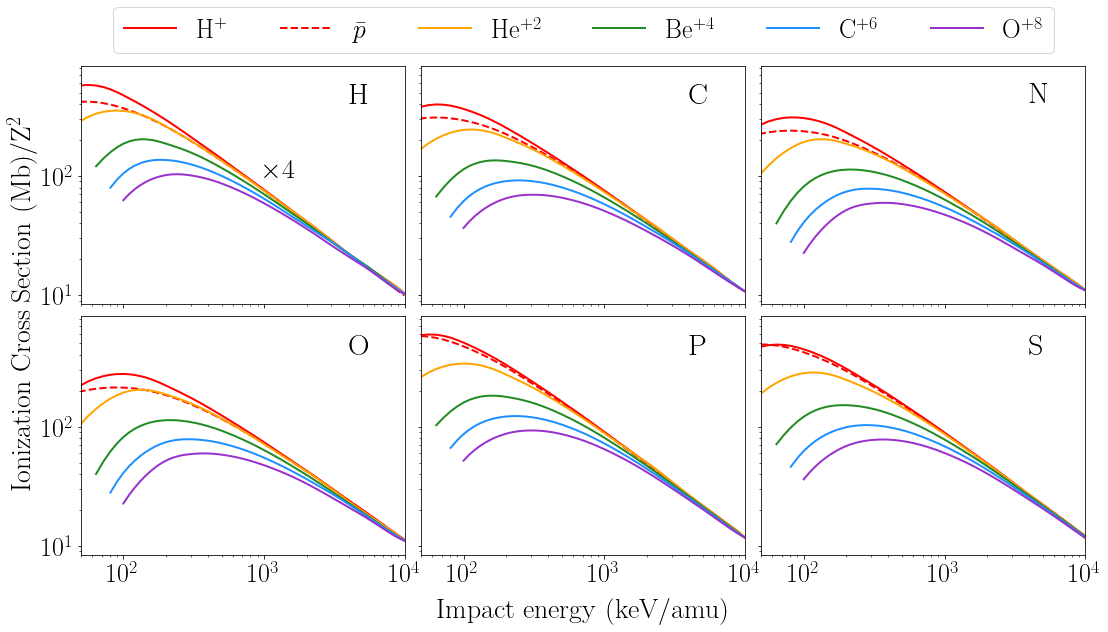

In [79]:
xmin=50.
xmax=convkeV(20)
ymin=0.3*convMb
ymax=30*convMb
xtext=4000
ytext=400
iminus=0

fig = plt.figure(figsize=(18,9))
ax1 = plt.subplot(231)
plt.plot(convkeV(xH_Pint),4*yH_Pint*convMb,'red',linewidth=2,label=r'H$^{+}$')
plt.plot(convkeV(xH_APint),4*yH_APint*convMb,'red',linestyle='--',linewidth=2,label=r'$\bar{p}$')
plt.plot(convkeV(xH_Heint),4*yH_Heint*convMb/2**2,'orange',linewidth=2,label=r'He$^{+2}$')
plt.plot(convkeV(xH_Beint[6:]),4*yH_Beint[6:]*convMb/4**2,'forestgreen',linewidth=2,label=r'Be$^{+4}$')
plt.plot(convkeV(xH_Cint[8:]),4*yH_Cint[8:]*convMb/6**2,'dodgerblue',linewidth=2,label=r'C$^{+6}$')
plt.plot(convkeV(xH_Oint[10:]),4*yH_Oint[10:]*convMb/8**2,'darkorchid',linewidth=2,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=26);
plt.ylabel("Ionization Cross Section (Mb)/Z$^2$", fontsize=28,labelpad=5,position=(1,0))
ax1.legend(loc='upper left',bbox_to_anchor=(0.06, 1.3, 0, 0),fontsize=26,ncol=6)
plt.text(xtext, ytext, 'H',fontsize=30)
plt.text(1000,100, r'$\times$4',fontsize=28)

ax2 = plt.subplot(232)
plt.plot(convkeV(xC_Pint), yC_Pint*convMb,'red',linewidth=2,label=r'H$^{+}$')
plt.plot(convkeV(xC_APint), yC_APint*convMb,'red',linestyle='--',linewidth=2,label=r'$\bar{p}$')
plt.plot(convkeV(xC_Heint),yC_Heint*convMb/2**2,'orange',linewidth=2,label=r'He$^{+2}$')
plt.plot(convkeV(xC_Beint[6:]),yC_Beint[6:]*convMb/4**2,'forestgreen',linewidth=2,label=r'Be$^{+4}$')
plt.plot(convkeV(xC_Cint[8:]), yC_Cint[8:]*convMb/6**2,'dodgerblue',linewidth=2,label=r'C$^{+6}$')
plt.plot(convkeV(xC_Oint[10:]),  yC_Oint[10:]*convMb/8**2,'darkorchid',linewidth=2,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=26);
plt.text(xtext, ytext, 'C',fontsize=30)

ax3 = plt.subplot(233)
plt.plot(convkeV(xN_Pint), yN_Pint*convMb,'red',linewidth=2,label=r'H$^{+}$')
plt.plot(convkeV(xN_APint), yN_APint*convMb,'red',linestyle='--',linewidth=2,label=r'$\bar{p}$')
plt.plot(convkeV(xN_Heint),yN_Heint*convMb/2**2,'orange',linewidth=2,label=r'He$^{+2}$')
plt.plot(convkeV(xN_Beint[6:]),yN_Beint[6:]*convMb/4**2,'forestgreen',linewidth=2,label=r'Be$^{+4}$')
plt.plot(convkeV(xN_Cint[8:]), yN_Cint[8:]*convMb/6**2,'dodgerblue',linewidth=2,label=r'C$^{+6}$')
plt.plot(convkeV(xN_Oint[10:]), yN_Oint[10:]*convMb/8**2,'darkorchid',linewidth=2,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=26);
plt.text(xtext, ytext, 'N',fontsize=30)
### Oxigeno ###
ax4 = plt.subplot(234)
plt.plot(convkeV(xO_Pint), yO_Pint*convMb,'red',linewidth=2,label=r'H$^{+}$')
plt.plot(convkeV(xO_APint), yO_APint*convMb,'red',linestyle='--',linewidth=2,label=r'$\bar{p}$')
plt.plot(convkeV(xO_Heint),yN_Heint*convMb/2**2,'orange',linewidth=2,label=r'He$^{+2}$')
plt.plot(convkeV(xO_Beint[6:]),yN_Beint[6:]*convMb/4**2,'forestgreen',linewidth=2,label=r'Be$^{+4}$')
plt.plot(convkeV(xO_Cint[8:]), yN_Cint[8:]*convMb/6**2,'dodgerblue',linewidth=2,label=r'C$^{+6}$')
plt.plot(convkeV(xO_Oint[10:]), yN_Oint[10:]*convMb/8**2,'darkorchid',linewidth=2,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=26);
plt.text(xtext, ytext, 'O',fontsize=30)
### Sulfuro ###
ax5 = plt.subplot(235)
plt.plot(convkeV(xP_Pint), yP_Pint*convMb,'red',linewidth=2,label=r'H$^{+}$')
plt.plot(convkeV(xP_APint), yP_APint*convMb,'red',linestyle='--',linewidth=2,label=r'$\bar{p}$')
plt.plot(convkeV(xP_Heint),yP_Heint*convMb/2**2,'orange',linewidth=2,label=r'He$^{+2}$')
plt.plot(convkeV(xP_Beint[6:]),yP_Beint[6:]*convMb/4**2,'forestgreen',linewidth=2,label=r'Be$^{+4}$')
plt.plot(convkeV(xP_Cint[8:]), yP_Cint[8:]*convMb/6**2,'dodgerblue',linewidth=2,label=r'C$^{+6}$')
plt.plot(convkeV(xP_Oint[10:]),  yP_Oint[10:]*convMb/8**2,'darkorchid',linewidth=2,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=26);
plt.xlabel("Impact energy (keV/amu)", fontsize=28,labelpad=10)
plt.text(xtext, ytext, 'P',fontsize=30)

ax6 = plt.subplot(236)
plt.plot(convkeV(xS_Pint),     yS_Pint*convMb,'red',linewidth=2,label=r'H$^{+}$')
plt.plot(convkeV(xS_APint),    yS_APint*convMb,'red',linestyle='--',linewidth=2,label=r'$\bar{p}$')
plt.plot(convkeV(xS_Heint),    yS_Heint*convMb,'orange',linewidth=2,label=r'He$^{+2}$')
plt.plot(convkeV(xS_Beint[6:]),yS_Beint[6:]*convMb,'forestgreen',linewidth=2,label=r'Be$^{+4}$')
plt.plot(convkeV(xS_Cint[8:]), yS_Cint[8:]*convMb,'dodgerblue',linewidth=2,label=r'C$^{+6}$')
plt.plot(convkeV(xS_Oint[10:]),yS_Oint[10:]*convMb,'darkorchid',linewidth=2,label=r'O$^{+8}$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=26);
plt.text(xtext, ytext, 'S',fontsize=30)

for ax in fig.get_axes():
    ax.label_outer()
fig.subplots_adjust(hspace=0.05, wspace=0.05)

plt.savefig("../atomicscaling.eps",bbox_inches='tight')
plt.show()